# Graficar en Python

*Matrices y Machine Learning*

## 1. Introducción a Matplotlib

In [24]:
from matplotlib import pyplot as plt

Como primer ejemplo, grafiquemos la función $f(x) = x^2$ para $x \in [0, 1]$. Para esto, creamos dos listas, una con los valores de $x$, y la otra con los valores correspondientes en el eje $y$. Para crear la lista de $x$, lo que querríamos es una lista con valores equiespaciados entre $0$ y $1$. Desarrollemos esto matemáticamente:

La idea es crear puntos $\{x_i\}_{i=0}^n$ de tal modo que

$$0 = x_0 < x_1 < \dots x_n = 1$$

Y que además estos puntos dividan el intervlo en $n$ partes iguales. Nótese que para esto se necesitan $n+1$ puntos y por ello los estamos etiquetando desde el 0.

Si vamos a dividir en $n$ partes iguales, cada una de ellas debe ser de largo $1/n$ y por lo tanto observamos que podemos obtener los puntos como:

- $x_0 = 0$
- $x_1 = 0 + 1/n = 1/n$
- $x_2 = x_1 + 1/n = 1/n + 1/n = 2/n$
- $x_3 = x_2 + 1/n = 2/n + 1/n = 3/n$

Y así sucesivamente. En general, obtenemos entonces la fórmula $x_i = i/n$. Esto para $i = 0, 1, \dots n$. Nótese que esto calza bien ya que se cumple que $x_n = n/n = 1$, como debería ser.

Podemos entonces implementar esta fórmula si partimos de una lista vacía como en el código siguiente:

In [25]:
n = 10  # fijamos n como ejemplo
X = []
for i in range(n+1):  # La función range(k) va desde 0 hasta k-1, por lo que debemos hacer n+1 para que pare en n
    X.append(i/n)
print(X)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


O bien podemos hacer esta misma implementación más concisamente utilizando [listas por comprensión](https://www.w3schools.com/python/python_lists_comprehension.asp):

In [26]:
X = [i/n for i in range(n+1)]
print(X)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


**Ejercicio propuesto:**

Rehacer lo que ya se hizo en $[0, 1]$ para ver que en general, para hacer una lista de $n+1$ puntos equiespaciados en el intervalo $[a, b]$ tales que $a = x_0 < x_1 < \dots < x_n = b$, se debe tener que
$$x_i = a + i \frac{b-a}{n}$$
Implementar esta fórmula dentro de una función `lista_equiespeciada(a, b, n)` que reciba los extremos, así como el número de partes en las que dividir el intervalo, y retorne la lista con los $n+1$ puntos.

In [27]:
def lista_equiespeciada(a, b, n):
    """Genera una lista que divide el intervalo [a, b] en n partes iguales

    Args:
        a (float): extremo izquierdo del intervalo
        b (float): extremo derecho del intervalo
        n (int): número de partes en las que dividir el intervalo

    Returns:
        list: lista ordenada con los puntos equiespaciados
    """
    assert n != 0, "No se puede dividir por 0!"
    assert a < b, "Extremos inválidos, verificar"


    L = None  # Reemplazar None por tu código


    return L

Por supuesto, no somos las primeras personas del mundo en necesitar una lista equiespaciada de puntos. Por lo que esta y muchas otras funcionalidades vagamente matemáticas han sido incorporadas a `python` como parte de la librería `numpy`. En particular, nos interesa la función `linspace`, que proviene de _linearly spaced_, para retornar puntos linealmente especiados. Esta será la función que en adelante utilizaremos para este propósito.

In [28]:
import numpy as np

X = np.linspace(0, 1, 11)  # Notar que acá se debe escribir el $n+1$ para obtener los mismos resultados en lugar del n.
                           # Para muchos de nuestros propósitos, esta distinción no importa.
print(X)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


Notar que el tipo de dato es una clase nativa de `numpy`, en lugar de una lista común y corriente

In [29]:
type(X)

numpy.ndarray

Esto es debido a que las listas (o _arreglos_) de `numpy` tienen varias ventajas por sobre las listas normales de `python`, que logran un mejor rendimiento en la práctica al tomar ventaja de que cosas como que
- El tipo de datos que puede contener una lista de `numpy` es uno solo, en lugar de las listas de python que pueden ser como `L = [1, 0.2, "hola"]`. Esto es flexible, pero no funciona muy bien para propósitos númericos.
- Las listas de numpy no pueden cambiar de longitud fácilmente ni agregar elementos luego de crearlas. Cosa que sí se puede hacer con listas de python mediante el método `L.append()`, usado al principio de este notebook. Esto significa que el computador sabe desde el inicio la memoria que necesitará y puede optimizar operaciones de bajo nivel en base a ello.

Por cosas como estas, algo muy cool que se puede hacer con listas de `numpy` es operaciones punto a punto.

In [30]:
M = np.array([1, 2, 3, 4], dtype=float)
# Nota: En este ejemplo, estoy especificando desde el principio que la lista de numpy M va a contener floats
# aunque le esté pasando solo enteros al momento de crearla
M

array([1., 2., 3., 4.])

In [31]:
2*M

array([2., 4., 6., 8.])

In [32]:
M + 1

array([2., 3., 4., 5.])

In [33]:
M ** 2  # Cuadrado

array([ 1.,  4.,  9., 16.])

In [34]:
M / 2

array([0.5, 1. , 1.5, 2. ])

Y esto es muy útil para nuestro propósito original de graficar la función $f(x) = x^2$ en $x \in [0, 1]$, ya que podemos hacer lo siguiente:

In [35]:
n = 20
X = np.linspace(0, 1, n)
Y = X ** 2

Ahora tenemos dos listas, una con nuestros valores de $x$ y otra para sus correspondientes valores de $y$. Las podemos graficar usando `matplotlib` con la siguiente linea de código:

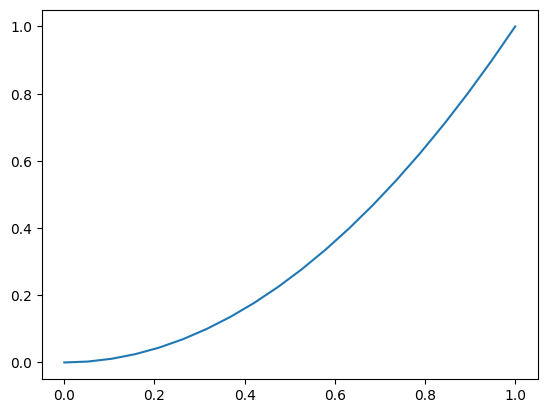

In [ ]:
plt.plot(X, Y)

Aquí, la librería está viendo los puntos que tenemos y conectándolos por líneas, pero si queremos ser más sinceros con respecto a los datos que realmente tenemos de la función, podemos suprimir este comportamiento y solo graficar los puntos de la siguiente forma:

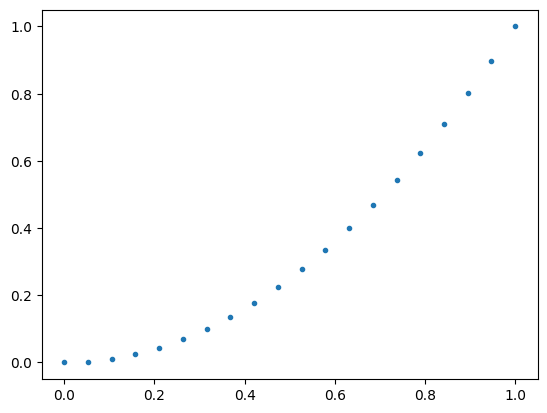

In [37]:
plt.plot(X, Y, ".")

Y finalmente, hagamos algunas configuraciones simples para agregar títulos, nombres en los ejes y cosas por el estilo:

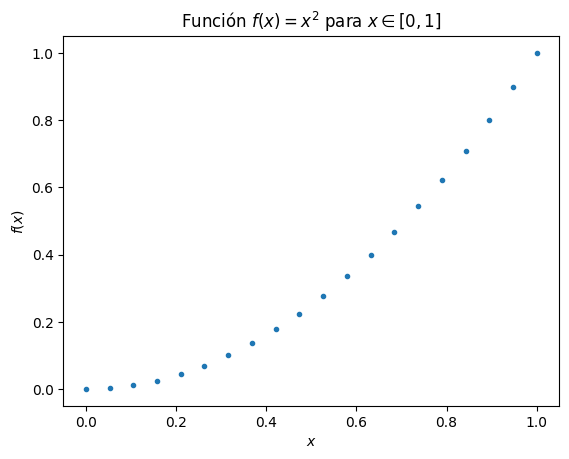

In [39]:
plt.plot(X, Y, ".")
plt.title("Función $f(x) = x^2$ para $x \in [0, 1]$")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.show()

Y si eres el tipo de persona a quien le gustan los modos oscuros, también se puede:

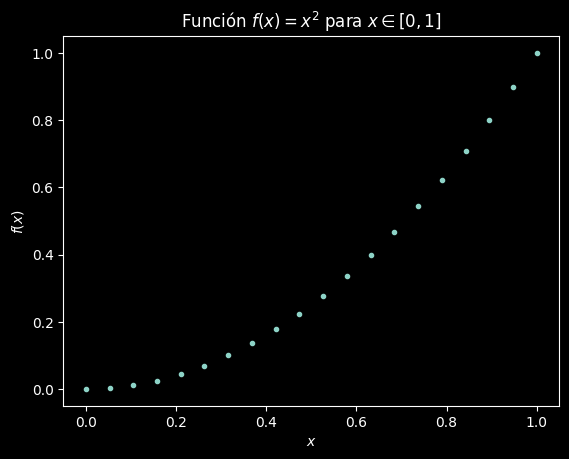

In [40]:
plt.style.use('dark_background')  # Añadir esto para activar el estilo

plt.plot(X, Y, ".")
plt.title("Función $f(x) = x^2$ para $x \in [0, 1]$")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.show()

Ver [aquí](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) para una galería de `matplotlib` con varios estilos.